# Strength Analysis

In [ ]:
import codecs
import os
import spacy
import json
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from pathlib import Path
from nltk.tokenize import sent_tokenize
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
print(pd.__version__)
print(np.__version__)
print(nx.__version__)

1.5.3
1.22.4
3.1


# Graph Construction

In [ ]:
# Load the data
f = open("/content/Harry Potter 1 Sorcerer's_Stone.txt", "r")
HarryPotter = f.read()

In [ ]:
characters = ["Harry",
"Hermione",
"Ron",
"Dumbledore",
"Voldemort",
"Hagrid",
"Draco",
"McGonagall",
"Snape",
"Quirrell",
"Neville",
"Vernon",
"Petunia",
"Dudley",
"Hedwig",
"Fred",
"George",
"Lily",
"James",
"Sorting Hat",
"Oliver Wood",
"Filch",
"Seamus",
"Goyle",
"Crabbe",
"Ginny",
"Griphook",
"Ollivander"
]

In [ ]:
HarryPotter = HarryPotter.replace('Harry Potter', 'Harry')
HarryPotter = HarryPotter.replace('Granger','Hermione')
HarryPotter = HarryPotter.replace('Potter', 'Harry')
HarryPotter = HarryPotter.replace('Ron Weasley', 'Ron')
HarryPotter = HarryPotter.replace('Hermione Granger','Hermione')
HarryPotter = HarryPotter.replace('Draco Malfoy', 'Draco')
HarryPotter = HarryPotter.replace('Malfoy','Draco')
HarryPotter = HarryPotter.replace('Albus Dumbledore', 'Dumbledore')
HarryPotter = HarryPotter.replace('Albus','Dubmledore')
HarryPotter = HarryPotter.replace('Rubeus Hagrid', 'Hagrid')
HarryPotter = HarryPotter.replace('Rubeus','Hagrid')
HarryPotter = HarryPotter.replace('You-Know-Who', 'Voldemort')
HarryPotter = HarryPotter.replace('You- Know-Who','Voldemort')
HarryPotter = HarryPotter.replace('He-Who-Must-Not-Be-Named','Voldemort')

In [ ]:
char_df = pd.DataFrame(0, index=characters, columns=characters)
char_df.head()

,Harry,Hermione,Ron,Dumbledore,Voldemort,Hagrid,Draco,McGonagall,Snape,Quirrell,...,James,Sorting Hat,Oliver Wood,Filch,Seamus,Goyle,Crabbe,Ginny,Griphook,Ollivander
Harry,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Hermione,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Ron,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Dumbledore,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Voldemort,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
sentences = sent_tokenize(HarryPotter)
print(len(sentences))

6394


In [ ]:
for sentence in sentences:
    for char1 in characters:
        for char2 in characters:
            if (char1 != char2) and char1 in sentence and char2 in sentence:
                char_df[char1][char2] += 1
                char_df[char2][char1] += 1

char_df.head()

,Harry,Hermione,Ron,Dumbledore,Voldemort,Hagrid,Draco,McGonagall,Snape,Quirrell,...,James,Sorting Hat,Oliver Wood,Filch,Seamus,Goyle,Crabbe,Ginny,Griphook,Ollivander
Harry,0,164,302,50,22,150,68,38,74,50,...,8,0,2,18,18,10,10,0,2,14
Hermione,164,0,152,4,0,22,10,6,22,6,...,0,0,0,0,2,2,2,0,0,0
Ron,302,152,0,10,6,48,30,8,24,4,...,0,0,0,0,2,8,6,2,0,0
Dumbledore,50,4,10,0,8,18,2,20,4,2,...,2,0,0,0,0,0,0,0,0,0
Voldemort,22,0,6,8,0,6,0,0,10,12,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
G = nx.Graph()
G = nx.from_pandas_adjacency(char_df)


In [ ]:
newdf.head()

,Harry,Hermione,Ron,Dumbledore,Voldemort,Hagrid,Draco,McGonagall,Snape,Quirrell,...,James,Sorting Hat,Oliver Wood,Filch,Seamus,Goyle,Crabbe,Ginny,Griphook,Ollivander
Harry,0,164,302,50,22,150,68,38,74,50,...,8,0,2,18,18,10,10,0,2,14
Hermione,164,0,152,4,0,22,10,6,22,6,...,0,0,0,0,2,2,2,0,0,0
Ron,302,152,0,10,6,48,30,8,24,4,...,0,0,0,0,2,8,6,2,0,0
Dumbledore,50,4,10,0,8,18,2,20,4,2,...,2,0,0,0,0,0,0,0,0,0
Voldemort,22,0,6,8,0,6,0,0,10,12,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
newdf=char_df.copy()

In [ ]:
df=newdf.astype(bool).astype(int)
df.head()

,Harry,Hermione,Ron,Dumbledore,Voldemort,Hagrid,Draco,McGonagall,Snape,Quirrell,...,James,Sorting Hat,Oliver Wood,Filch,Seamus,Goyle,Crabbe,Ginny,Griphook,Ollivander
Harry,0,1,1,1,1,1,1,1,1,1,...,1,0,1,1,1,1,1,0,1,1
Hermione,1,0,1,1,0,1,1,1,1,1,...,0,0,0,0,1,1,1,0,0,0
Ron,1,1,0,1,1,1,1,1,1,1,...,0,0,0,0,1,1,1,1,0,0
Dumbledore,1,1,1,0,1,1,1,1,1,1,...,1,0,0,0,0,0,0,0,0,0
Voldemort,1,0,1,1,0,1,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
G = nx.Graph()
G = nx.from_pandas_adjacency(df)


In [ ]:
print("Number of nodes in the graph:", len(G.nodes()))
print("Nodes:", G.nodes())
print()
print("Number of edges in the graph:", len(G.edges()))
print("Edges:", G.edges(data=True))

Number of nodes in the graph: 28
Nodes: ['Harry', 'Hermione', 'Ron', 'Dumbledore', 'Voldemort', 'Hagrid', 'Draco', 'McGonagall', 'Snape', 'Quirrell', 'Neville', 'Vernon', 'Petunia', 'Dudley', 'Hedwig', 'Fred', 'George', 'Lily', 'James', 'Sorting Hat', 'Oliver Wood', 'Filch', 'Seamus', 'Goyle', 'Crabbe', 'Ginny', 'Griphook', 'Ollivander']

Number of edges in the graph: 126
Edges: [('Harry', 'Hermione', {'weight': 164}), ('Harry', 'Ron', {'weight': 302}), ('Harry', 'Dumbledore', {'weight': 50}), ('Harry', 'Voldemort', {'weight': 22}), ('Harry', 'Hagrid', {'weight': 150}), ('Harry', 'Draco', {'weight': 68}), ('Harry', 'McGonagall', {'weight': 38}), ('Harry', 'Snape', {'weight': 74}), ('Harry', 'Quirrell', {'weight': 50}), ('Harry', 'Neville', {'weight': 52}), ('Harry', 'Vernon', {'weight': 56}), ('Harry', 'Petunia', {'weight': 28}), ('Harry', 'Dudley', {'weight': 78}), ('Harry', 'Hedwig', {'weight': 6}), ('Harry', 'Fred', {'weight': 14}), ('Harry', 'George', {'weight': 8}), ('Harry', 'Lil

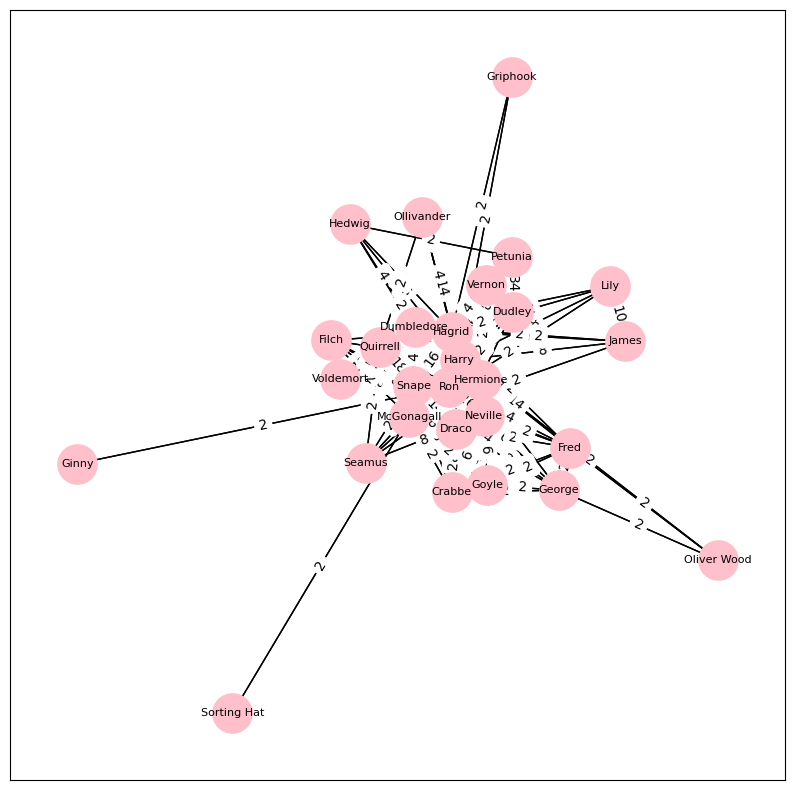

In [ ]:
plt.figure(5, figsize=(10,10))
pos = nx.fruchterman_reingold_layout(G)

nx.draw_networkx(G, pos=pos, node_size = 800, font_size=8, node_color="pink")
nx.draw_networkx_edges(G, pos=pos)
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos=pos, edge_labels=edge_labels)
plt.show()

# Cycles of Length 3

In [ ]:
cycle3 = []

for i in range(0,28):
  for j in range(0,28):
    if(char_df[characters[i]][characters[j]]>0): #if edge exists
      for k in range(0,28):
        if(i!=k and char_df[characters[j]][characters[k]]>0 and char_df[characters[i]][characters[k]]>0):  #if other two edges exist
          if([i,j,k] not in cycle3 and [j,i,k] not in cycle3 and [k,i,j] not in cycle3 and [i,k,j] not in cycle3 and [j,k,i] not in cycle3 and [k,j,i] not in cycle3):
            cycle3.append([i,j,k])
            print(characters[i],characters[j],characters[k]);

Harry Hermione Ron
Harry Hermione Dumbledore
Harry Hermione Hagrid
Harry Hermione Draco
Harry Hermione McGonagall
Harry Hermione Snape
Harry Hermione Quirrell
Harry Hermione Neville
Harry Hermione Vernon
Harry Hermione Seamus
Harry Hermione Goyle
Harry Hermione Crabbe
Harry Ron Dumbledore
Harry Ron Voldemort
Harry Ron Hagrid
Harry Ron Draco
Harry Ron McGonagall
Harry Ron Snape
Harry Ron Quirrell
Harry Ron Neville
Harry Ron Dudley
Harry Ron Hedwig
Harry Ron Fred
Harry Ron George
Harry Ron Seamus
Harry Ron Goyle
Harry Ron Crabbe
Harry Dumbledore Voldemort
Harry Dumbledore Hagrid
Harry Dumbledore Draco
Harry Dumbledore McGonagall
Harry Dumbledore Snape
Harry Dumbledore Quirrell
Harry Dumbledore Neville
Harry Dumbledore Hedwig
Harry Dumbledore Lily
Harry Dumbledore James
Harry Voldemort Hagrid
Harry Voldemort Snape
Harry Voldemort Quirrell
Harry Hagrid Draco
Harry Hagrid McGonagall
Harry Hagrid Snape
Harry Hagrid Neville
Harry Hagrid Vernon
Harry Hagrid Petunia
Harry Hagrid Dudley
Harry Ha

In [ ]:
len(cycle3)

285

In [ ]:
char_df.to_csv("Adajacencymatrix.csv")

# Cycles of Length 6

In [ ]:
cycle6 = []

for i in range(0,28):
  for j in range(0,28):
    if(char_df[characters[i]][characters[j]]>0): #edge btw i and j
      for k in range(0,28):
        if(i!=k and char_df[characters[j]][characters[k]]>0): #edge btw j and k
          for l in range(0,28):
            if(i!=l and j!=l and char_df[characters[l]][characters[k]]>0): #edge between l and k
              for m in range(0,28):
                if(i!=m and j!=m and k!=m and char_df[characters[l]][characters[m]]>0): #edge between l and m
                  for n in range(0,28):
                    if(i!=n and j!=n and k!=n and l!=n and char_df[characters[n]][characters[m]]>0 and char_df[characters[n]][characters[i]]>0): #edge between m and n and edge btw n and i to complete the cycle
                      whatever = []
                      whatever.append(i)
                      whatever.append(j)
                      whatever.append(k)
                      whatever.append(l)
                      whatever.append(m)
                      whatever.append(n)
                      whatever.sort()
                      if(whatever not in cycle6):
                        cycle6.append(whatever)

                      # print(characters[i],characters[j],characters[k],characters[l],characters[m],characters[n])
                  

In [ ]:
x=[]
l=[3,2,1]
l.sort()
x.append(l)
x

[[1, 2, 3]]

In [ ]:
cycle6

[[0, 1, 2, 3, 4, 5],
 [0, 1, 2, 3, 4, 8],
 [0, 1, 2, 3, 4, 9],
 [0, 1, 2, 3, 5, 6],
 [0, 1, 2, 3, 5, 7],
 [0, 1, 2, 3, 5, 8],
 [0, 1, 2, 3, 5, 10],
 [0, 1, 2, 3, 5, 11],
 [0, 1, 2, 3, 5, 12],
 [0, 1, 2, 3, 5, 13],
 [0, 1, 2, 3, 5, 14],
 [0, 1, 2, 3, 5, 15],
 [0, 1, 2, 3, 5, 17],
 [0, 1, 2, 3, 5, 18],
 [0, 1, 2, 3, 5, 21],
 [0, 1, 2, 3, 5, 26],
 [0, 1, 2, 3, 5, 27],
 [0, 1, 2, 3, 6, 7],
 [0, 1, 2, 3, 6, 8],
 [0, 1, 2, 3, 6, 10],
 [0, 1, 2, 3, 6, 13],
 [0, 1, 2, 3, 6, 15],
 [0, 1, 2, 3, 6, 16],
 [0, 1, 2, 3, 6, 21],
 [0, 1, 2, 3, 6, 23],
 [0, 1, 2, 3, 6, 24],
 [0, 1, 2, 3, 7, 8],
 [0, 1, 2, 3, 7, 9],
 [0, 1, 2, 3, 7, 10],
 [0, 1, 2, 3, 7, 17],
 [0, 1, 2, 3, 7, 18],
 [0, 1, 2, 3, 7, 21],
 [0, 1, 2, 3, 7, 23],
 [0, 1, 2, 3, 7, 24],
 [0, 1, 2, 3, 8, 9],
 [0, 1, 2, 3, 8, 10],
 [0, 1, 2, 3, 8, 15],
 [0, 1, 2, 3, 8, 16],
 [0, 1, 2, 3, 8, 21],
 [0, 1, 2, 3, 8, 22],
 [0, 1, 2, 3, 8, 23],
 [0, 1, 2, 3, 8, 24],
 [0, 1, 2, 3, 9, 22],
 [0, 1, 2, 3, 9, 27],
 [0, 1, 2, 3, 10, 15],
 [0, 1, 2, 3, 10, 21

In [ ]:
len(cycle6)

15972

Yes, it is possible for a social network to have more hexagonal cycles than triangular cycles.

In a social network, nodes represent individuals, and edges represent connections between individuals. A cycle is a closed path in the network that starts and ends at the same node, and a hexagonal cycle is a cycle that passes through six nodes, while a triangular cycle passes through three nodes.

The number of hexagonal and triangular cycles in a social network depends on the structure of the network. For example, a social network where most individuals have six connections will tend to have more hexagonal cycles, while a network where most individuals have three connections will tend to have more triangular cycles.

It is possible for a social network to have more hexagonal cycles than triangular cycles if the network has a relatively high degree of clustering. Clustering refers to the tendency for individuals to form clusters or communities in a network. In a highly clustered network, individuals tend to have many connections to others in their cluster, which can result in the formation of hexagonal cycles.

In summary, the number of hexagonal and triangular cycles in a social network depends on the network's structure, and it is possible for a social network to have more hexagonal cycles than triangular cycles if the network is highly clustered.

# Graph Energy

The graph energy is a mathematical concept that is used to characterize the total energy of a graph. The energy of a graph is a sum of the squared absolute values of the eigenvalues of its adjacency matrix. The adjacency matrix of a graph is a square matrix that represents the connections between the nodes of the graph.

The graph energy is a measure of the overall connectivity and organization of a graph. A higher graph energy value indicates that the graph is more strongly connected and better organized, whereas a lower graph energy value indicates a weaker connectivity and organization.

Graph energy has applications in various fields, such as chemistry, physics, and network science. For example, in chemistry, the graph energy of a molecule can be used to predict its reactivity and stability. In physics, the graph energy of a system can be used to analyze its quantum mechanical properties. In network science, the graph energy can be used to compare the overall connectivity and organization of different networks.

In [ ]:
nodes = ["Hagrid", "Draco", "McGonagall"]
subgraph = G.subgraph(nodes)

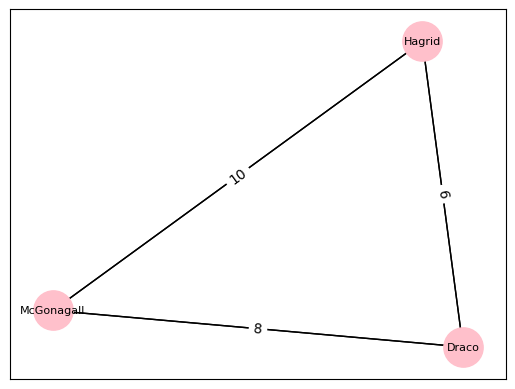

In [ ]:
nx.draw_networkx(subgraph, pos=pos, node_size = 800, font_size=8, node_color="pink")
nx.draw_networkx_edges(subgraph, pos=pos)
edge_labels = nx.get_edge_attributes(subgraph, 'weight')
nx.draw_networkx_edge_labels(subgraph, pos=pos, edge_labels=edge_labels)
plt.show()

In [ ]:
A = nx.adjacency_matrix(subgraph).todense()
eigvals = np.linalg.eigvals(A)
energy = sum(abs(eigvals)**2)
print("Graph Energy:", energy)

Graph Energy: 400.00000000000017


In [ ]:
TotalEnergy3 = 0
for i in cycle3:
  nodes=[characters[i[0]], characters[i[1]], characters[i[2]]]
  subgraph = G.subgraph(nodes)
  A = nx.adjacency_matrix(subgraph).todense()
  eigvals = np.linalg.eigvals(A)
  energy = sum(abs(eigvals)**2)
  TotalEnergy3 = TotalEnergy3 + energy
TotalEnergy3 / len(cycle3)

20329.43157894737

After removing node 3

In [ ]:
TotalEnergy2 = 0
for i in cycle3:
  nodes=[characters[i[0]], characters[i[1]]]
  subgraph = G.subgraph(nodes)
  A = nx.adjacency_matrix(subgraph).todense()
  eigvals = np.linalg.eigvals(A)
  energy = sum(abs(eigvals)**2)
  TotalEnergy2 = TotalEnergy2 + energy
TotalEnergy2 / len(cycle3)

17160.81403508772

In [ ]:
norm2=(TotalEnergy3-TotalEnergy2)/TotalEnergy3
norm2

0.15586355828763

After removing node 2

In [ ]:
TotalEnergy31 = 0
for i in cycle3:
  nodes=[characters[i[0]], characters[i[2]]]
  subgraph = G.subgraph(nodes)
  A = nx.adjacency_matrix(subgraph).todense()
  eigvals = np.linalg.eigvals(A)
  energy = sum(abs(eigvals)**2)
  TotalEnergy31 = TotalEnergy31 + energy
TotalEnergy31 / len(cycle3)

2597.642105263158

After removing node 1

In [ ]:
TotalEnergy4 = 0
for i in cycle3:
  nodes=[characters[i[1]], characters[i[2]]]
  subgraph = G.subgraph(nodes)
  A = nx.adjacency_matrix(subgraph).todense()
  eigvals = np.linalg.eigvals(A)
  energy = sum(abs(eigvals)**2)
  TotalEnergy4 = TotalEnergy4 + energy
TotalEnergy4 / len(cycle3)

570.9754385964912

In [ ]:
norm4=(TotalEnergy3-TotalEnergy4)/TotalEnergy3
norm4

0.9719138512860449

FOR CYCLE6

In [ ]:
TotalEnergy6 = 0
for i in cycle6:
  nodes=[characters[i[0]], characters[i[1]], characters[i[2]], characters[i[3]], characters[i[4]], characters[i[5]]]
  subgraph = G.subgraph(nodes)
  A = nx.adjacency_matrix(subgraph).todense()
  eigvals = np.linalg.eigvals(A)
  energy = sum(abs(eigvals)**2)
  TotalEnergy6 = TotalEnergy6 + energy
TotalEnergy6/len(cycle6)

79143.89030803907

After removing node 1 (index:0)

In [ ]:
TotalEnergy5 = 0
for i in cycle6:
  nodes=[characters[i[1]], characters[i[2]], characters[i[3]], characters[i[4]], characters[i[5]]]
  subgraph = G.subgraph(nodes)
  A = nx.adjacency_matrix(subgraph).todense()
  eigvals = np.linalg.eigvals(A)
  energy = sum(abs(eigvals)**2)
  TotalEnergy5 = TotalEnergy5 + energy
TotalEnergy5/len(cycle6)

4662.254445279239

In [ ]:
norm5=(TotalEnergy6-TotalEnergy5)/TotalEnergy6
norm5

0.9410914168215248

After removing node 6

In [ ]:
TotalEnergy5 = 0
for i in cycle6:
  nodes=[characters[i[0]],characters[i[1]], characters[i[2]], characters[i[3]], characters[i[4]]]
  subgraph = G.subgraph(nodes)
  A = nx.adjacency_matrix(subgraph).todense()
  eigvals = np.linalg.eigvals(A)
  energy = sum(abs(eigvals)**2)
  TotalEnergy5 = TotalEnergy5 + energy
TotalEnergy5/len(cycle6)

78003.14901076884

In [ ]:
norm5=(TotalEnergy6-TotalEnergy5)/TotalEnergy6
norm5

0.014413510541752479

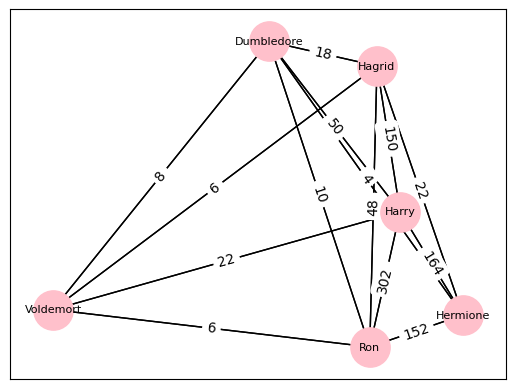

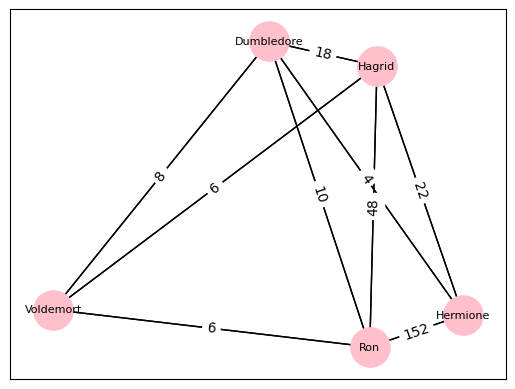

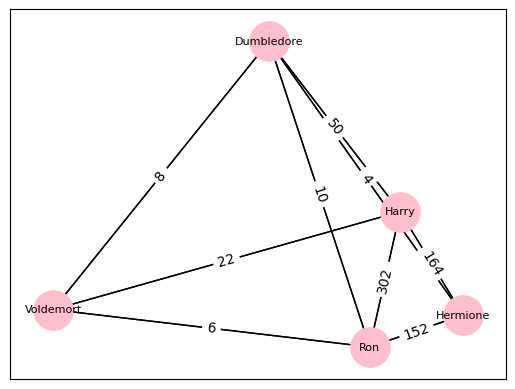

In [ ]:
for i in cycle6:  
  nodes=[characters[i[0]], characters[i[1]], characters[i[2]], characters[i[3]], characters[i[4]],characters[i[5]]]
  subgraph = G.subgraph(nodes)
  nx.draw_networkx(subgraph, pos=pos, node_size = 800, font_size=8, node_color="pink")
  nx.draw_networkx_edges(subgraph, pos=pos)
  edge_labels = nx.get_edge_attributes(subgraph, 'weight')
  nx.draw_networkx_edge_labels(subgraph, pos=pos, edge_labels=edge_labels)
  plt.show()

  #remove node 1
  nodes=[ characters[i[1]], characters[i[2]], characters[i[3]], characters[i[4]],characters[i[5]]]
  subgraph = G.subgraph(nodes)
  nx.draw_networkx(subgraph, pos=pos, node_size = 800, font_size=8, node_color="pink")
  nx.draw_networkx_edges(subgraph, pos=pos)
  edge_labels = nx.get_edge_attributes(subgraph, 'weight')
  nx.draw_networkx_edge_labels(subgraph, pos=pos, edge_labels=edge_labels)
  plt.show()

  #remove node 6
  nodes=[ characters[i[0]],characters[i[1]], characters[i[2]], characters[i[3]], characters[i[4]]]
  subgraph = G.subgraph(nodes)
  nx.draw_networkx(subgraph, pos=pos, node_size = 800, font_size=8, node_color="pink")
  nx.draw_networkx_edges(subgraph, pos=pos)
  edge_labels = nx.get_edge_attributes(subgraph, 'weight')
  nx.draw_networkx_edge_labels(subgraph, pos=pos, edge_labels=edge_labels)
  plt.show()

  break

# Algebraic Connectivity

The algebraic connectivity is a graph metric that characterizes the overall connectivity and robustness of a graph. It is defined as the second smallest eigenvalue of the Laplacian matrix of the graph, which is a square matrix that encodes the connections between the nodes of the graph.

The algebraic connectivity is significant because it provides information about the ability of a graph to maintain connectivity in the face of node or edge failures. A higher algebraic connectivity value indicates that the graph is more robust to such failures, while a lower algebraic connectivity value indicates that the graph is more vulnerable.

The algebraic connectivity has applications in various fields, such as computer science, engineering, and social networks. For example, in computer science, the algebraic connectivity can be used to analyze the robustness of computer networks against cyber attacks. In engineering, the algebraic connectivity can be used to design more reliable communication networks. In social networks, the algebraic connectivity can be used to study the resilience of human social systems against disruptions.

In [ ]:
TotalConnectivity3 = 0
for i in cycle3:
  nodes=[characters[i[0]], characters[i[1]], characters[i[2]]]
  subgraph = G.subgraph(nodes)
  L = nx.laplacian_matrix(subgraph).todense()
  eigvals = np.linalg.eigvals(L)
  alg_conn = eigvals[1]
  TotalConnectivity3 = TotalConnectivity3 + alg_conn
TotalConnectivity3/len(cycle3)

13.043799853985586

After removing node 3

In [ ]:
TotalConnectivity2 = 0
for i in cycle3:
  nodes=[characters[i[0]], characters[i[1]]]
  subgraph = G.subgraph(nodes)
  L = nx.laplacian_matrix(subgraph).todense()
  eigvals = np.linalg.eigvals(L)
  alg_conn = eigvals[1]
  TotalConnectivity2 = TotalConnectivity2 + alg_conn
TotalConnectivity2/len(cycle3)

-1.6532584268453208e-15

After removing node 2

In [ ]:
TotalConnectivity2 = 0
for i in cycle3:
  nodes=[characters[i[0]], characters[i[2]]]
  subgraph = G.subgraph(nodes)
  L = nx.laplacian_matrix(subgraph).todense()
  eigvals = np.linalg.eigvals(L)
  alg_conn = eigvals[1]
  TotalConnectivity2 = TotalConnectivity2 + alg_conn
TotalConnectivity2/len(cycle3)

-2.9294305772565536e-16

After removing node 1

In [ ]:
TotalConnectivity2 = 0
for i in cycle3:
  nodes=[characters[i[1]], characters[i[2]]]
  subgraph = G.subgraph(nodes)
  L = nx.laplacian_matrix(subgraph).todense()
  eigvals = np.linalg.eigvals(L)
  alg_conn = eigvals[1]
  TotalConnectivity2 = TotalConnectivity2 + alg_conn
TotalConnectivity2/len(cycle3)

-5.001846889890179e-16

For cycle6

In [ ]:
TotalConnectivity6 = 0
for i in cycle6:
  nodes=[characters[i[0]], characters[i[1]], characters[i[2]], characters[i[3]], characters[i[4]], characters[i[5]]]
  subgraph = G.subgraph(nodes)
  L = nx.laplacian_matrix(subgraph).todense()
  eigvals = np.linalg.eigvals(L)
  alg_conn = eigvals[1]
  TotalConnectivity6 = TotalConnectivity6 + alg_conn
TotalConnectivity6/len(cycle6)

119.77700268168218

After removing node 1

In [ ]:
TotalConnectivity5 = 0
for i in cycle6:
  nodes=[characters[i[1]], characters[i[2]], characters[i[3]], characters[i[4]], characters[i[5]]]
  subgraph = G.subgraph(nodes)
  L = nx.laplacian_matrix(subgraph).todense()
  eigvals = np.linalg.eigvals(L)
  alg_conn = eigvals[1]
  TotalConnectivity5 = TotalConnectivity5 + alg_conn
TotalConnectivity5/len(cycle6)

26.483365627689484

After removing node 6

In [ ]:
TotalConnectivity5 = 0
for i in cycle6:
  nodes=[characters[i[0]],characters[i[1]], characters[i[2]], characters[i[3]], characters[i[4]]]
  subgraph = G.subgraph(nodes)
  L = nx.laplacian_matrix(subgraph).todense()
  eigvals = np.linalg.eigvals(L)
  alg_conn = eigvals[1]
  TotalConnectivity5 = TotalConnectivity5 + alg_conn
TotalConnectivity5/len(cycle6)

99.1109943244355

# Inferences

The graph energy and algebraic connectivity can increase or decrease with an increase in the number of nodes in a graph, depending on the specific characteristics of the graph.

For example, in a regular graph where each node has the same number of edges, both the graph energy and algebraic connectivity can increase with an increase in the number of nodes. This is because regular graphs are highly symmetric and well-organized, which leads to a higher energy and algebraic connectivity.

However, in a random graph where the edges are formed randomly, the graph energy and algebraic connectivity may not necessarily increase with an increase in the number of nodes. In fact, the energy and algebraic connectivity of a random graph are typically dependent on the average degree of the graph, rather than the number of nodes.

In summary, the relationship between the number of nodes and the graph energy/algebraic connectivity depends on the specific characteristics of the graph.